<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/Project_Bearing_Nasa_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


In [ ]:
pip install keras

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling tenso

In [1]:
#import

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
#import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline


from numpy.random import seed
import tensorflow as tf

from keras.layers import Input, Dropout, Dense
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json



Phân Tích Dữ Liệu


In [2]:
data = '/content/drive/MyDrive/Colab Notebooks/Project_Cuối_Kỳ_DSP/dataset_2/1st_test/3rd_test/4th_test/txt'
merged_data = pd.DataFrame()

for filename in os.listdir(data):

    dataset=pd.read_csv(os.path.join(data, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())

    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 4)) # Chuyển đổi kết quả thành DataFrame có một hàng và bốn cột
    dataset_mean_abs.index = [filename]
    print(filename)
    merged_data = pd.concat([merged_data, dataset_mean_abs]) # ket noi cac data frame va thong nhat

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']


Streaming output truncated to the last 5000 lines.
2004.04.06.21.01.57
2004.04.06.21.11.57
2004.04.06.19.41.57
2004.04.06.20.21.57
2004.04.06.20.11.57
2004.04.06.20.31.57
2004.04.06.19.21.57
2004.04.06.21.31.57
2004.04.06.20.51.57
2004.04.06.20.01.57
2004.04.06.19.51.57
2004.04.06.19.31.57
2004.04.06.23.21.57
2004.04.06.22.01.57
2004.04.06.21.51.57
2004.04.06.22.11.57
2004.04.06.23.41.57
2004.04.06.23.01.57
2004.04.06.23.11.57
2004.04.06.22.41.57
2004.04.06.23.31.57
2004.04.06.22.31.57
2004.04.06.22.21.57
2004.04.06.22.51.57
2004.04.07.01.01.57
2004.04.07.00.51.57
2004.04.06.23.51.57
2004.04.07.02.01.57
2004.04.07.02.11.57
2004.04.07.01.31.57
2004.04.07.00.11.57
2004.04.07.01.21.57
2004.04.07.00.21.57
2004.04.07.00.01.57
2004.04.07.01.11.57
2004.04.07.02.21.57
2004.04.07.01.51.57
2004.04.07.00.31.57
2004.04.07.00.41.57
2004.04.07.01.41.57
2004.04.07.04.51.57
2004.04.07.02.31.57
2004.04.07.04.11.57
2004.04.07.02.51.57
2004.04.07.03.01.57
2004.04.07.04.01.57
2004.04.07.03.51.57
2004.04.0

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S',errors='coerce') # tranh loi "Not a Time"

merged_data = merged_data.sort_index()
merged_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Project_Cuối_Kỳ_DSP/dataset_2/1st_testmerged_dataset_BearingTest_3.csv')
merged_data.head(10)




,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475
2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039
2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360
2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126
2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617
2004-03-04 10:12:46,0.062235,0.073316,0.055018,0.042036
2004-03-04 10:22:46,0.062745,0.074658,0.054542,0.043538
2004-03-04 10:32:46,0.061096,0.072848,0.052854,0.042396
2004-03-04 10:42:46,0.062026,0.074598,0.055359,0.043537
2004-03-04 10:52:46,0.060961,0.073985,0.054707,0.042707


In [4]:
merged_data.describe()
#Standard deviation std

#mean

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,6383.000000,6383.000000,6383.000000,6383.000000
mean,0.058466,0.064624,0.057465,0.044203
std,0.005072,0.009298,0.023178,0.011079
min,0.001533,0.002441,0.003663,0.001428
25%,0.056463,0.061595,0.052603,0.040526
50%,0.057666,0.062764,0.053952,0.043432
75%,0.059236,0.064786,0.055326,0.044283
max,0.122483,0.224439,0.543770,0.244897


`Distributions bearing 1`

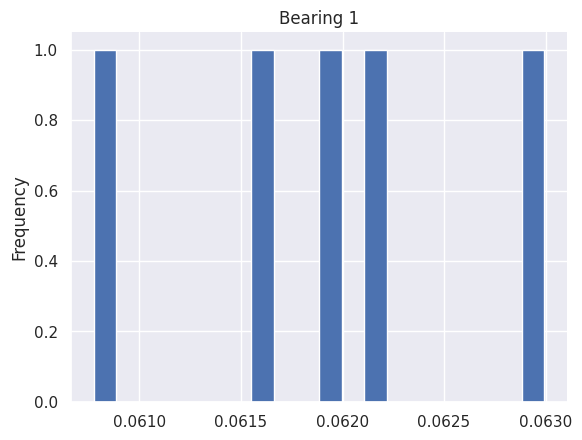

In [ ]:
Aacfrom matplotlib import pyplot as plt
_df_0['Bearing 1'].plot(kind='hist', bins=20, title='Bearing 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

*Values* Bearing 1

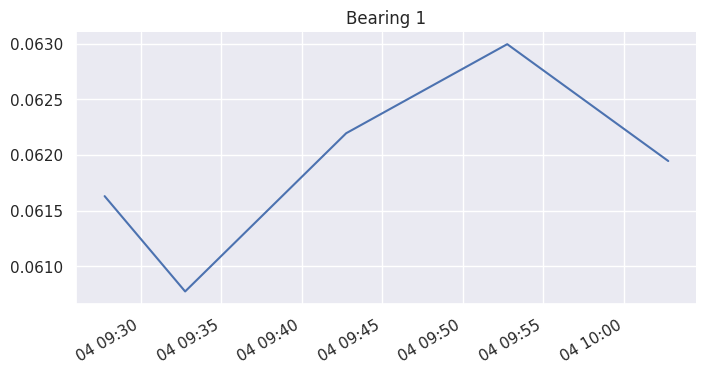

In [ ]:
from matplotlib import pyplot as plt
_df_7['Bearing 1'].plot(kind='line', figsize=(8, 4), title='Bearing 1')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-5-1f28bc988ecf>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dataset_test = merged_data['2004-03-15 23:00:00':]


<Axes: >

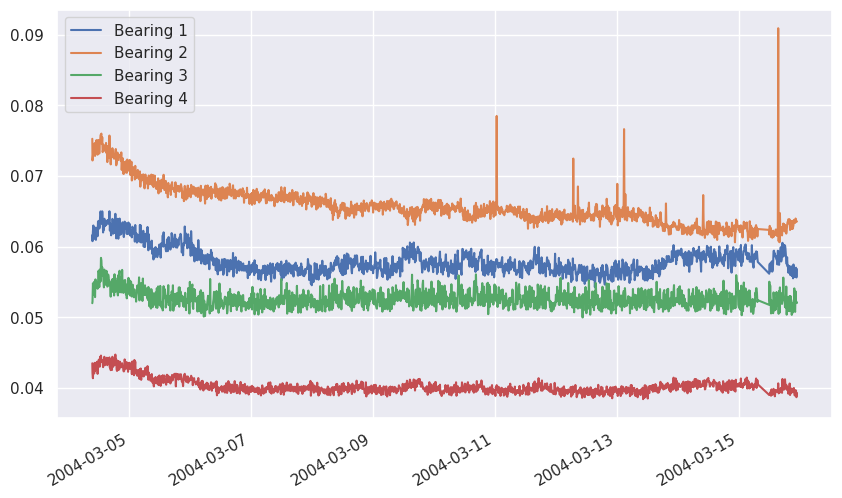

In [5]:
dataset_train = merged_data['2004-03-04 09:27:46':'2004-03-15 23:00:00']
dataset_test = merged_data['2004-03-15 23:00:00':]
dataset_train.plot(figsize = (10,6))

Tiền Xử Lý Dữ Liệu

In [8]:
# Create a MinMaxScaler instance
scaler = preprocessing.MinMaxScaler() # Phạm vi (1,1)

# Apply the scaler to the training dataset and create a new DataFrame
X_train= pd.DataFrame(scaler.fit_transform(dataset_train),
                               columns=dataset_train.columns,
                               index=dataset_train.index)

# Randomly shuffle the training data
X_train_shuffled = X_train.sample(frac=1)

# Apply the scaler to the testing dataset and create a new DataFrame
X_test = pd.DataFrame(scaler.transform(dataset_test),
                              columns=dataset_test.columns,
                              index=dataset_test.index)


In [9]:
from sklearn.decomposition import PCA

# Create PCA instance
pca = PCA(n_components=2, svd_solver='full')

# Fit and transform the training data
X_train_pca= pd.DataFrame(pca.fit_transform(X_train), index=X_train.index)

# Transform the test data
X_test_pca= pd.DataFrame(pca.transform(X_test), index=X_test.index)


In [10]:
import numpy as np

def cov_matrix(data, verbose=False):

    covariance_matrix = np.cov(data, rowvar=False)

    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix) # Tính giá trị riêng của ma trận

        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            if verbose:
                print("Error: Nghịch đảo của ma trận hiệp phương sai không xác định dương!")
            raise ValueError("Nghịch đảo của ma trận hiệp phương sai không xác định dương!")
    else:
        if verbose:
            print("Error: Ma trận hiệp phương sai không xác định dương!")
        raise ValueError("Ma trận hiệp phương sai không xác định dương!")

def is_pos_def(matrix):

    return np.all(np.linalg.eigvals(matrix) > 0)
# https://viblo.asia/p/distance-measure-trong-machine-learning-ByEZkopYZQ0#_2-manhattan-distance-2

In [11]:
def mahalanobis_distance(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    #Công thức khoảng cách Mahalanobis
    dsp_Mahalanobis = [np.sqrt(np.dot(diff[i], np.dot(inv_covariance_matrix, diff[i]))) for i in range(len(diff))]

    return dsp_Mahalanobis


In [12]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 4. if extreme else 2.#K LÀ HỆ SỐ NHÂN ĐẶT CHO NGƯỠNG
    # Thuật toán kiểm soát độ ngoại lê, sai số của hệ thống
    threshold = np.mean(dist) * k # giá trung bình nhân hệ số k
    outliers = [value for value in dist if abs(value) >= threshold]
    return np.array(outliers)
    return threshold


In [13]:
# Kiểm tra độ đối xứng của matrix
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A) # phân tách dữ liệu
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [14]:
# Set up model
data_train = np.array(X_train_pca.values)
data_test = np.array(X_test_pca.values)

In [15]:
data_train = np.array(X_train_pca.values)
data_test = np.array(X_test_pca.values)


In [16]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

mean_distr = data_train.mean(axis=0)


 Mahalanobis distance: xem xét mối tương quan giữa các biến trong tập dữ liệu, khiến nó trở thành một công cụ có giá trị trong các ứng dụng khác nhau như phát hiện ngoại lệ, phân cụm và phân loại.

D² = (x-μ)ᵀΣ⁻¹(x-μ)

In [17]:

# Calculate Mahalanobis distance for the test data
dist_test = mahalanobis_distance(inv_cov_matrix, mean_distr, data_test, verbose=False)

# Calculate Mahalanobis distance for the training data
dist_train = mahalanobis_distance(inv_cov_matrix, mean_distr, data_train, verbose=False)

# Set the threshold for Mahalanobis distance using training data
threshold = MD_detectOutliers(dist_train, extreme=True)



<ipython-input-18-fb5bc134b1dd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.square(dist_train),


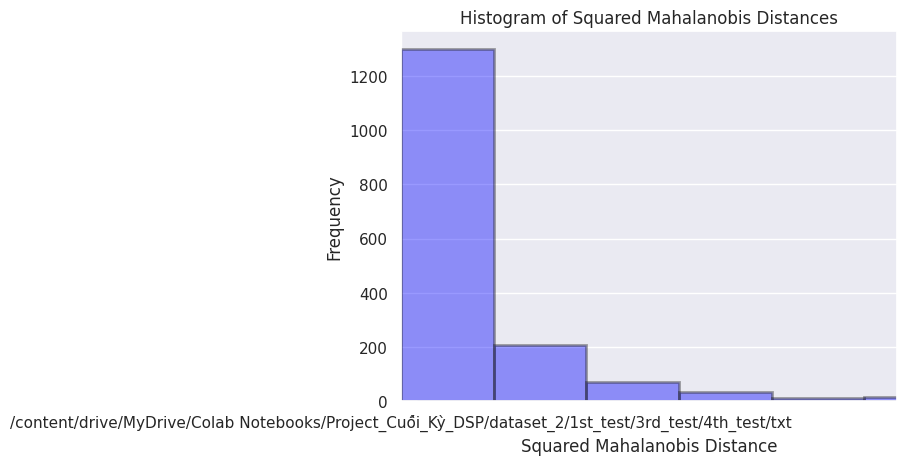

In [18]:


# Create a figure
plt.figure()

# Plot a histogram of squared Mahalanobis distances
sns.distplot(np.square(dist_train),
             bins=10,
             kde=False,
             color='blue',
             hist_kws=dict(edgecolor="k", linewidth=2))  # Add edgecolor and linewidth for better visibility
sns.histplot(data, kde=True)
# Set x-axis limit
plt.xlim([0.0, 15])

# Add labels and title
plt.xlabel('Squared Mahalanobis Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Squared Mahalanobis Distances')

# Show the plot
plt.show()

Phân phối dữ liệu. Biểu đồ bình phương khoảng cách Mahalanobis của tất cả các điểm dữ liệu huấn luyện

<ipython-input-19-e3e36020521e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dist_train,


Text(0.5, 0, 'Mahalanobis Distance')

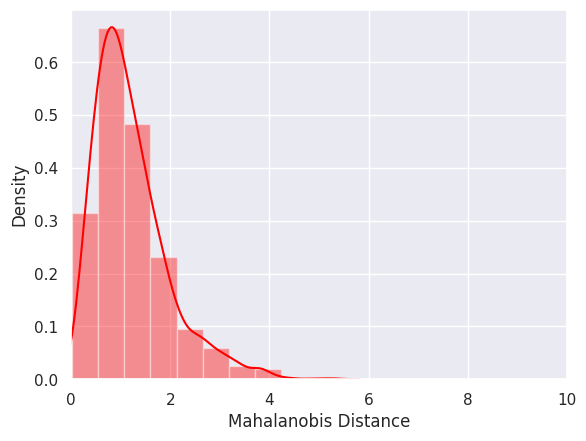

In [19]:
plt.figure()
sns.distplot(dist_train,
             bins = 10,
             kde= True,
             color = 'red');
plt.xlim([0.0,10])
plt.xlabel('Mahalanobis Distance')


Xây dựng đường cong chuẩn đa chiều được xếp chồng lên nhau với phân bố x^2 với 2 bậc tự do (đường đỏ).

https://rpubs.com/maulikpatel/228515. Link tham khảo

---

Mahalamnobis

In [20]:
import random
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Activation function
activation_function = 'elu'

# Define model
model = Sequential()

# Input layer
model.add(Dense(10, activation=activation_function,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(2, activation=activation_function,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10, activation=activation_function,
                kernel_initializer='glorot_uniform'))

# Output layer
model.add(Dense(X_train.shape[1], kernel_initializer='glorot_uniform'))




In [21]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(np.array(X_train), np.array(X_train),
                       batch_size=10,
                       epochs=150,
                       validation_split=0.05,
                       verbose=1)

Epoch 1/150
156/156 [==============================] - 2s 3ms/step - loss: 0.0328 - val_loss: 0.0128
Epoch 2/150
156/156 [==============================] - 1s 5ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 3/150
156/156 [==============================] - 1s 3ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 4/150
156/156 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0075
Epoch 5/150
156/156 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0072
Epoch 6/150
156/156 [==============================] - 1s 7ms/step - loss: 0.0025 - val_loss: 0.0071
Epoch 7/150
156/156 [==============================] - 2s 13ms/step - loss: 0.0023 - val_loss: 0.0066
Epoch 8/150
156/156 [==============================] - 1s 9ms/step - loss: 0.0022 - val_loss: 0.0067
Epoch 9/150
156/156 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0063
Epoch 10/150
156/156 [==============================] - 1s 7ms/step - loss: 0.0021 - val_l

In [23]:
#predictions
X_predict = model.predict(np.array(X_test))

# Create a DataFrame with predicted values
X_predict = pd.DataFrame(X_predict, columns=X_test.columns, index=X_test.index)

# Calculate mean absolute error (MAE) sai số tuyệt đối
loss = np.mean(np.abs(X_predict - X_test), axis=1)

# Set a dynamic threshold based on the mean and standard deviation of the loss (đặt ngưỡng tổn thất thất sai số cho phép)
threshold = np.mean(loss) + 2 * np.std(loss)

# Identify anomalies based on the threshold (Xác định bất thường hệ thống khi huấn luyện)
Anomalies = loss > threshold

# Display the results
scored = pd.DataFrame({
    'Loss': loss,
    'Threshold': threshold,
    'Anomalies': Anomalies})

print(scored.head(20))



147/147 [==============================] - 0s 2ms/step
                         Loss  Threshold  Anomalies
2004-03-15 23:05:20  0.030466   3.000204      False
2004-03-15 23:15:20  0.022285   3.000204      False
2004-03-15 23:25:20  0.007502   3.000204      False
2004-03-15 23:35:20  0.120375   3.000204      False
2004-03-15 23:45:20  0.030606   3.000204      False
2004-03-15 23:55:20  0.010034   3.000204      False
2004-03-16 00:05:20  0.009277   3.000204      False
2004-03-16 00:15:20  0.030242   3.000204      False
2004-03-16 00:25:20  0.014042   3.000204      False
2004-03-16 00:35:20  0.016247   3.000204      False
2004-03-16 00:45:20  0.329993   3.000204      False
2004-03-16 00:55:20  0.018445   3.000204      False
2004-03-16 01:05:20  0.033560   3.000204      False
2004-03-16 01:15:20  0.037888   3.000204      False
2004-03-16 01:25:20  0.039541   3.000204      False
2004-03-16 01:35:20  0.020922   3.000204      False
2004-03-16 01:45:20  0.021790   3.000204      False
2004-03-1